In [1]:
%matplotlib inline
from PIL import Image

import house_segmentation
import img2pc
import pc2schem

### Setup

In [2]:
grounding_dino_model = house_segmentation.init_grounding_dino_model()
sam_predictor = house_segmentation.init_sam_model()
point_e_sampler = img2pc.init_model()

/homes/jwuelfingen/anaconda3/envs/games/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343964576/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
[Point-E] creating base model...
[Point-E] creating upsample model...
[Point-E] downloading base checkpoint...
[Point-E] downloading upsampler checkpoint...
[Point-E] creating sampler...
[Point-E] done


### Main

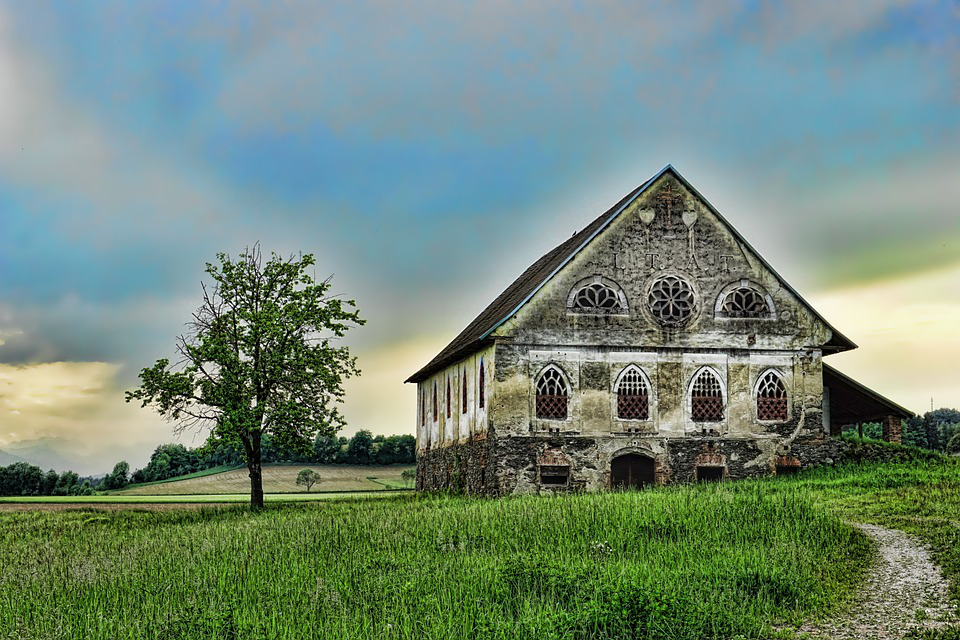

In [3]:
IMG_NAME = 'real_house_background.jpg'
SIZE = 18
image = Image.open('images/' + IMG_NAME)
display(image)

/homes/jwuelfingen/anaconda3/envs/games/lib/python3.9/site-packages/transformers/modeling_utils.py:905: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/homes/jwuelfingen/anaconda3/envs/games/lib/python3.9/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


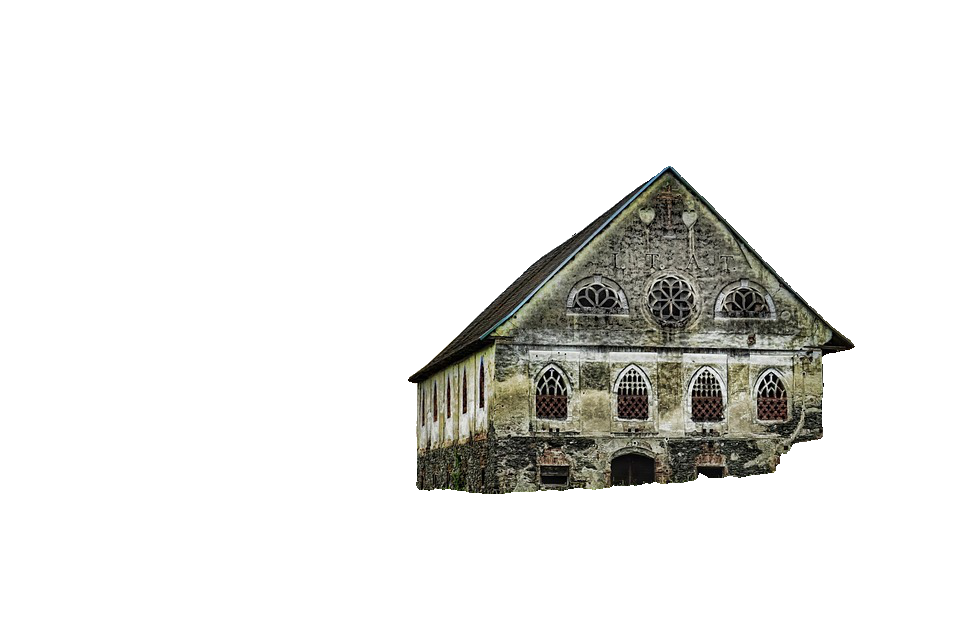

In [4]:
segmented = house_segmentation.segment_house(image, grounding_dino_model, sam_predictor)
display(segmented)

0it [00:00, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


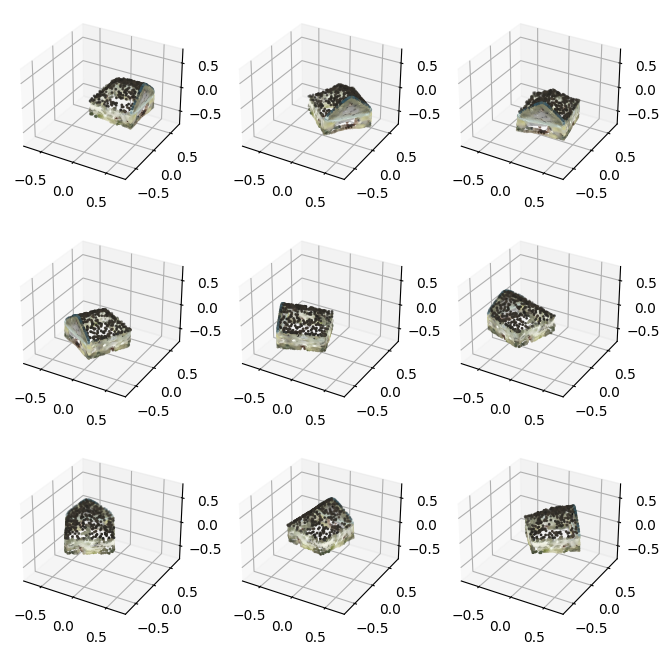

In [5]:
pc = img2pc.create_pointcloud(segmented, point_e_sampler)
img2pc.plot(pc);

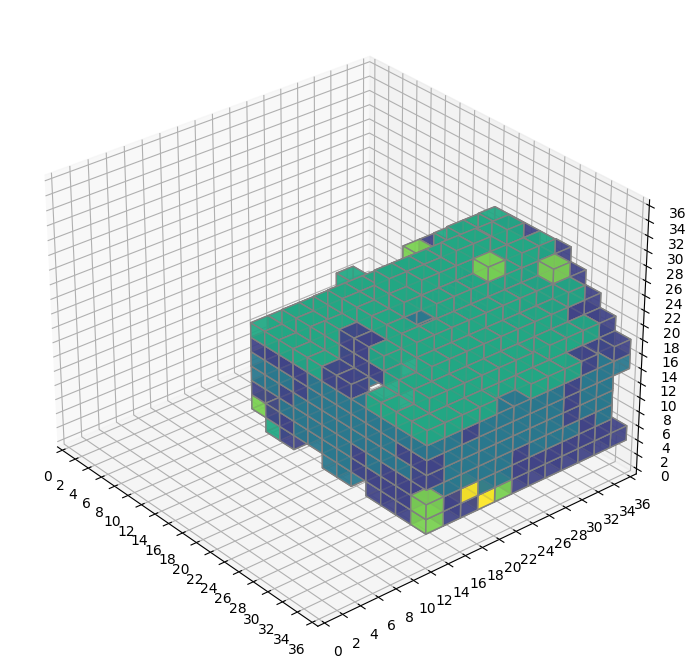

In [6]:
voxels, schem_palette = pc2schem.pc2voxels(pc, SIZE)
pc2schem.plot_cube(voxels, angle=320);

NBTFile('Schematic'): {9 Entries}
{
	TAG_Int('Version'): 2
	TAG_Int('DataVersion'): 3465
	TAG_Compound('Metadata'): {3 Entries}
	{
		TAG_Int('WEOffsetX'): 0
		TAG_Int('WEOffsetY'): 0
		TAG_Int('WEOffsetZ'): 0
	}
	TAG_Short('Width'): 18
	TAG_Short('Height'): 18
	TAG_Short('Length'): 18
	TAG_Int('PaletteMax'): 6
	TAG_Compound('Palette'): {6 Entries}
	{
		TAG_Int('minecraft:air'): 0
		TAG_Int('minecraft:stone'): 1
		TAG_Int('minecraft:birch_planks'): 2
		TAG_Int('minecraft:dark_oak_planks'): 3
		TAG_Int('minecraft:spruce_planks'): 4
		TAG_Int('minecraft:oak_planks'): 5
	}
	TAG_Byte_Array('BlockData'): [5832 byte(s)]
}


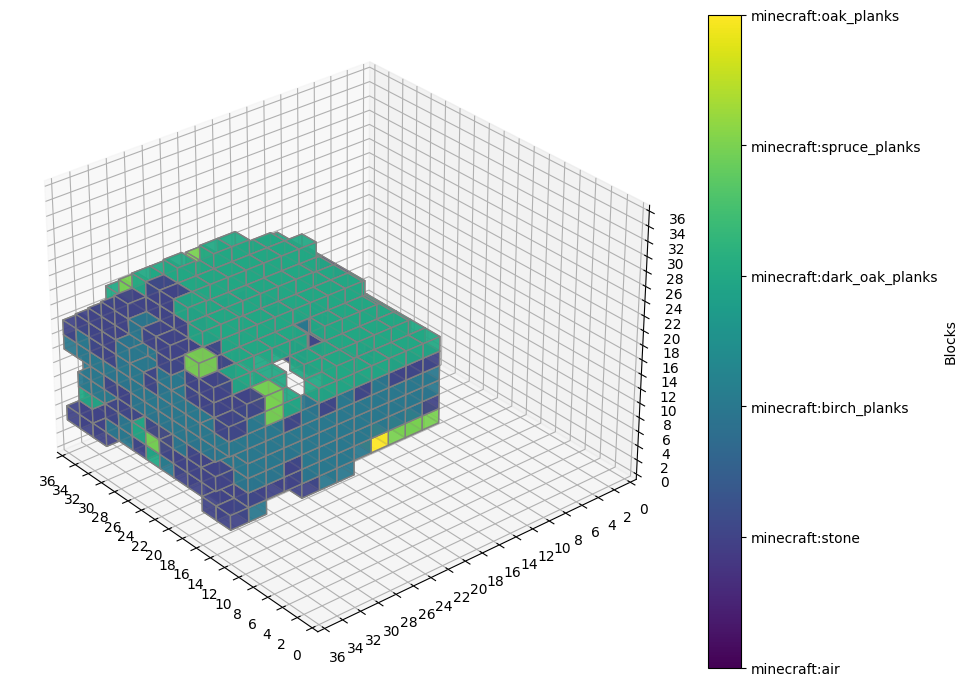

In [7]:
nbtfile_from_voxels = pc2schem.voxel_to_nbtfile(filename=IMG_NAME.rsplit('.', 1)[0] + f'_size{SIZE}', block_data=voxels, palette=schem_palette)
print(nbtfile_from_voxels.pretty_tree())
pc2schem.plot_schem(nbtfile_from_voxels)
nbtfile_from_voxels.write_file()